# <center>K-Nearest Neighbors</center>

## About the dataset

This dataset involves a telecommunications provider that has segmented its customers into four service groups:
Basic, E-Service, Plus, and Total Service... based on usage patterns. The objective is to use demographic data like region, age, and marital status to predict which service group a new or unknown customer belongs to. This is a supervised classification problem where the goal is to customize service offers based on the predicted group. The chosen model for this task is the K-Nearest Neighbors (KNN) classifier, which will classify new customers by analyzing the most similar customers from the existing dataset.

In [1]:
# Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn import preprocessing
%matplotlib inline

In [2]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# Loading the dataset
data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv')
data.to_csv('telecom.csv')
df = pd.read_csv('telecom.csv')

In [4]:
df

,Unnamed: 0,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


## Data Visualization and Analysis

In [5]:
# Checking how many of each class is in the data set

df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

Basic Service (266), E-Service (217), Plus Service (281), and Total Service (236)

(array([445., 267., 115.,  52.,  39.,  22.,  12.,  15.,   5.,   5.,   6.,
          2.,   3.,   2.,   0.,   1.,   0.,   2.,   1.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   9.  ,   42.18,   75.36,  108.54,  141.72,  174.9 ,  208.08,
         241.26,  274.44,  307.62,  340.8 ,  373.98,  407.16,  440.34,
         473.52,  506.7 ,  539.88,  573.06,  606.24,  639.42,  672.6 ,
         705.78,  738.96,  772.14,  805.32,  838.5 ,  871.68,  904.86,
         938.04,  971.22, 1004.4 , 1037.58, 1070.76, 1103.94, 1137.12,
        1170.3 , 1203.48, 1236.66, 1269.84, 1303.02, 1336.2 , 1369.38,
        1402.56, 1435.74, 1468.92, 1502.1 , 1535.28, 1568.46, 1601.64,
        1634.82, 1668.  ]),
 <BarContainer object of 50 artists>)

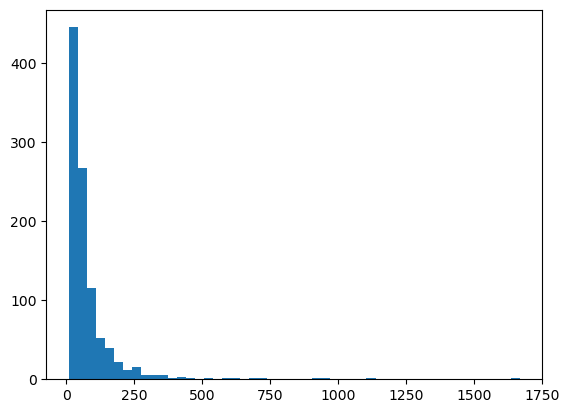

In [7]:
plt.hist(x = 'income', data = df, bins = 50)

## Data Preprocessing

### Defining X  and y feature sets

In [8]:
df.columns

Index(['Unnamed: 0', 'region', 'tenure', 'age', 'marital', 'address', 'income',
       'ed', 'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [9]:
# Converting the Pandas data frame into a Numpy array:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [10]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train/Test Split

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print('Train set shape: ', x_train.shape, y_train.shape)
print('Test set shape: ', x_test.shape, y_test.shape)

Train set shape:  (800, 11) (800,)
Test set shape:  (200, 11) (200,)


### Classification (K-Nearest Neighbors)

In [14]:
# Importing k-nearest neighbors classifier from sklearn 
from sklearn.neighbors import KNeighborsClassifier

### Training and testing (Predicting)
Starting the algorithm with k = 4:

In [16]:
# Setting k to 4

k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)

# Predicting
yhat = neigh.predict(x_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [17]:
k = 6 

neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)

yhat1 = neigh.predict(x_test)
yhat1[0:5]

array([3, 3, 3, 4, 4], dtype=int64)

In [18]:
k = 9

neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)

yhat2= neigh.predict(x_test)
yhat2[0:5]

array([3, 1, 3, 2, 4], dtype=int64)

### Model Accuracy

In multilabel classification, **accuracy classification score** function computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially calculates how much the actual labels and predicted labels are in the test set.

In [20]:
from sklearn import metrics

In [21]:
# Checking for accuracy

print('Train set Accuracy: ', metrics.accuracy_score(y_train, neigh.predict(x_train)))

# For yhat
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5025
Test set Accuracy:  0.32


In [22]:
# For yhat1
print('Test set Accuracy: ', metrics.accuracy_score(y_test, yhat1))

Test set Accuracy:  0.31


In [23]:
# for yhat2
print('Test Accuracy Score: ', metrics.accuracy_score(y_test, yhat2))

Test Accuracy Score:  0.34


In [23]:
metrics.accuracy_score(yhat2, y_test)

0.395

In [25]:
np.zeros(15)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by user. So, how we choose right K? The general solution is to reserve a part of you data for testing the accuracy of the model. Then choose k = 1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, see which k is the best for your model. 


We can calculate the accuracy of KNN for different Ks.

In [26]:
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
confusionMx = [];

for n in range(1, ks):
    # Training and predicting the model
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

### Plotting model accuracy for different Number of Neighbors

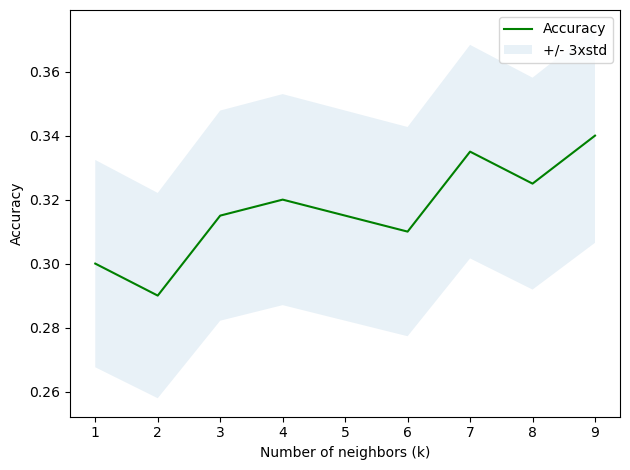

In [27]:
plt.plot(range(1, ks), mean_acc, 'g')
plt.fill_between(range(1, ks), mean_acc - 1 * std_acc, mean_acc + 1 *std_acc, alpha = 0.10)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors (k)')
plt.tight_layout()
plt.show()

In [29]:
print('The best accuracy was: ', mean_acc.max(), ' with k: ', mean_acc.argmax()+1)

The best accuracy was:  0.34  with k:  9


Summary: The increasing trend in accuracy with higher values of k might indicates that the model benefits from considering more neighbors, up to a certain point.